<h1 align="center"> Анализ данных вакансий сайта hh.ru на примере аналитиков данных и системных аналитиков</h1>
    
__Цель:__
    
Выявить различия в предлагаемых вакансиях для аналитиков данных и системных аналитиков.
    
__Порядок выполнения исследования:__
* Парсинг данных с использованием API hh.ru;
* Изучение данных в столбцах, их правка и чистка;
* Добавление необходимых столбцов в таблицу;
* Исследовательский анализ данных;
* Определение долей грейдов;
* Определение типичного места работы в зависимости от грейда;
* Доли хард и софт скиллов и определение наиболее важных из них по грейдам;
* Формулирование итогового вывода проведенного исследования.

In [1]:
# Импортируем необходимые библиотеки
import requests
import pandas as pd
import numpy as np

import json

from datetime import datetime, timedelta
import time
import os
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
from typing import Union

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from tqdm.notebook import tqdm

import re

from collections import Counter

In [2]:
import ast

In [3]:
# Установим максимальное количество отображаемых строк
# pd.set_option('display.max_rows', 400)  # Установите нужное значение

## 1. Получение данных из API hh.ru

После первичного ознакомления с предоставленными на проект исходными данными, было принято решение самостоятельно сформировать набор данных для выполнения проекта. Причины следующие:
* непонимание логики выборочного парсинга исходных данных (например, для аналитиков данных взяты отдельные даты за 5 месяцев);
* несовпадение периодов времени для рассматриваемых вакансий аналитиков и системных аналитиков;
* желание получить больший объем данных (например, в исходном датасете только у 3-х синьоров аналитиков данных указана ЗП);


В параметрах запроса использовался отбор по словам "Аналитик" или "Analyst" в поле названия вакансии, чтобы зацепить максимальное количество вариантов, которые могут относиться к аналитикам данных и системным аналитикам. В дальнейшем эти данные будут отфильтрованы.

Нам интересны российские вакансии, поэтому параметр area  ограничен значением 113 (id России).

Поскольку API сайта hh.ru позволяет получить только 2000 вакансий в одном запросе, мы, во-первых, ограничиваем временной промежуток за который собираем данные и, во-вторых, дробим запрос по отдельным уровням опыта работы.

Бесплатно можно загрузить данные только по открытым вакансиям за последние 30 дней. Закрытые вакансии уходят в архив и  мы теряем к ним доступ. Это на наш взгляд может несколько искажать объективное положение дел. Например, вакансии с самыми выгодными предложениями по зарплате закрываются очень быстро и выпадают из рассмотрения. А "плохие" предложения продолжают висеть. То есть средняя ЗП по свежим открытым вакансиям будет выше, чем у старых вакансий. Мы проверим эту гипотезу далее в исследовании. Исправить эту ситуацию можно ежедневным пополнением датасета вакансий. В рамках данного исследования такой возможности нет, поэтому мы использовали "мгновенный" слепок сайта hh.ru по состоянию на 18 августа 2024 года.

Рассмотрены вакансии опубликованные с 19 июля 2024 года по 18 августа 2024 года. Данные были собраны в 7 заходов, после чего были объединены в один датафрейм.

In [4]:
# BASE_URL = "https://api.hh.ru/"

# TEXT = f'NAME:(Аналитик OR Analyst)'

# dt_now = datetime.now().date()
# dt_from = dt_now - timedelta(days=2)
# DATE_TO = dt_now.isoformat() #API требует дату в формате ISO 8601 YYYY-MM-DD или YYYY-MM-DDThh:mm:ss±hhmm
# DATE_FROM = dt_from.isoformat()
# AREA = 113

# VAC_URL = (
#     BASE_URL 
#     + f'vacancies?text={TEXT}&date_from={DATE_FROM}&date_to={DATE_TO}'
#     + f'&area={AREA}&per_page=100&responses_count_enabled=True'
# )

In [5]:
# Создаем датафрейм в который будем сохранять наши данные
# vac_1 = pd.DataFrame()

In [6]:
# Выделим отдельные уровни опыта работы
# experiences = ['noExperience',
#                'between1And3',
#                'between3And6', 
#                'moreThan6']

Извлечем данные с вэб-сайта, используя различные уровни опыта работы

In [7]:
# for exp in experiences:
#     page = 0
#     url = VAC_URL + f'&experience={exp}'
#     try:
#         r = requests.get(url + f'&page={page}')
#         data = json.loads(r.text)
#         print(exp, ' – ', data['pages'])
#         items = data['items']
#         for page in tqdm(range(1, data['pages'])):
#             r = requests.get(url + f'&page={page}')
#             data = json.loads(r.text)
#             items += data['items']
#         df = pd.DataFrame(items)
#         df['experience'] = exp
#         vac_1 = pd.concat([vac_1, df])
#     except Exception as e:
#         print(exp, ' – ', e)
#         time.sleep(5)

In [8]:
# vac_1.to_csv("vac_1.csv")

In [9]:
# vac_2.to_csv("vac_2.csv")

In [10]:
# vac_3.to_csv("vac_3.csv")

In [11]:
# vac_4.to_csv("vac_4.csv")

In [12]:
# vac_5.to_csv("vac_5.csv")

In [13]:
# vac_6.to_csv("vac_6.csv")

In [14]:
# vac_7.to_csv("vac_7.csv")

In [15]:
vac_1 = pd.read_csv('vac_1.csv', usecols=lambda column: column != 'Unnamed: 0')
vac_2 = pd.read_csv('vac_2.csv', usecols=lambda column: column != 'Unnamed: 0')
vac_3 = pd.read_csv('vac_3.csv', usecols=lambda column: column != 'Unnamed: 0')
vac_4 = pd.read_csv('vac_4.csv', usecols=lambda column: column != 'Unnamed: 0')
vac_5 = pd.read_csv('vac_5.csv', usecols=lambda column: column != 'Unnamed: 0')
vac_6 = pd.read_csv('vac_6.csv', usecols=lambda column: column != 'Unnamed: 0')
vac_7 = pd.read_csv('vac_7.csv', usecols=lambda column: column != 'Unnamed: 0')

In [16]:
# Объединяем DataFrame
combined_df = pd.concat([vac_1, vac_2, vac_3, vac_4, vac_5, vac_6, vac_7], ignore_index=True)

# Проверяем наличие дубликатов
combined_df.duplicated().unique()

array([False])

In [17]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         15936 non-null  int64  
 1   premium                    15936 non-null  bool   
 2   name                       15936 non-null  object 
 3   department                 3011 non-null   object 
 4   has_test                   15936 non-null  bool   
 5   response_letter_required   15936 non-null  bool   
 6   area                       15936 non-null  object 
 7   salary                     5024 non-null   object 
 8   type                       15936 non-null  object 
 9   address                    8942 non-null   object 
 10  response_url               0 non-null      float64
 11  sort_point_distance        0 non-null      float64
 12  published_at               15936 non-null  object 
 13  created_at                 15936 non-null  obj

Очистим датафрейм от ненужных столбцов

In [18]:
combined_df = combined_df.drop(combined_df.columns[[1, 4, 5, 8, 9, 10, 11, 14, 15
                                                    , 16, 17, 19, 20, 23, 25, 28
                                                    , 30, 33, 34, 35, 36, 37]], axis=1)

In [19]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      15936 non-null  int64 
 1   name                    15936 non-null  object
 2   department              3011 non-null   object
 3   area                    15936 non-null  object
 4   salary                  5024 non-null   object
 5   published_at            15936 non-null  object
 6   created_at              15936 non-null  object
 7   url                     15936 non-null  object
 8   employer                15936 non-null  object
 9   snippet                 15936 non-null  object
 10  schedule                15936 non-null  object
 11  working_time_intervals  15936 non-null  object
 12  working_time_modes      15936 non-null  object
 13  professional_roles      15936 non-null  object
 14  experience              15936 non-null  object
 15  em

In [20]:
# Преобразование строковых представлений списков или словарей обратно в объекты Python
list_columns = ['working_time_intervals', 'working_time_modes', 'professional_roles']
dict_columns = ['department', 'area', 'salary', 'employment', 'employer', 'snippet', 'schedule']

for column in list_columns:
    combined_df[column] = combined_df[column].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)

for column in dict_columns:
    combined_df[column] = combined_df[column].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)

In [21]:
combined_df.head()

,id,name,department,area,salary,published_at,created_at,url,employer,snippet,schedule,working_time_intervals,working_time_modes,professional_roles,experience,employment
0,105905376,Аналитик данных,NaN,"{'id': '3', 'name': 'Екатеринбург', 'url': 'ht...",NaN,2024-08-16T11:10:50+0300,2024-08-16T11:10:50+0300,https://api.hh.ru/vacancies/105905376?host=hh.ru,"{'id': '71518', 'name': 'Artsofte', 'url': 'ht...","{'requirement': 'Знание Python, SQL и Excel, B...","{'id': 'fullDay', 'name': 'Полный день'}",[],[],"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",noExperience,"{'id': 'full', 'name': 'Полная занятость'}"
1,105945851,Junior IT специалист / системный аналитик / пр...,NaN,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 100000, 'to': 170000, 'currency': 'RU...",2024-08-17T20:55:17+0300,2024-08-17T20:55:17+0300,https://api.hh.ru/vacancies/105945851?host=hh.ru,"{'id': '11144658', 'name': 'Громова Лукия Макс...",{'requirement': 'Если у тебя нет профильного о...,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],"[{'id': '148', 'name': 'Системный аналитик'}]",noExperience,"{'id': 'full', 'name': 'Полная занятость'}"
2,105909066,"Стажировка/трудоустр: Инженер Аналитик, Програ...",NaN,"{'id': '35', 'name': 'Иркутск', 'url': 'https:...",NaN,2024-08-16T11:46:24+0300,2024-08-16T11:46:24+0300,https://api.hh.ru/vacancies/105909066?host=hh.ru,"{'id': '11093381', 'name': 'Инновационная Проц...",{'requirement': 'Желание развиваться в ИТ по р...,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],"[{'id': '164', 'name': 'Продуктовый аналитик'}]",noExperience,"{'id': 'full', 'name': 'Полная занятость'}"
3,103934893,Стажер системный аналитик,NaN,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...","{'from': 20000, 'to': 40000, 'currency': 'RUR'...",2024-08-16T18:01:12+0300,2024-08-16T18:01:12+0300,https://api.hh.ru/vacancies/103934893?host=hh.ru,"{'id': '10646936', 'name': 'Анарисуто', 'url':...",{'requirement': 'Освоить навыки оптимизации и ...,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],"[{'id': '148', 'name': 'Системный аналитик'}]",noExperience,"{'id': 'full', 'name': 'Полная занятость'}"
4,104461044,Младший аналитик данных,NaN,"{'id': '1437', 'name': 'Назрань', 'url': 'http...","{'from': 10000, 'to': 45000, 'currency': 'RUR'...",2024-08-16T15:15:42+0300,2024-08-16T15:15:42+0300,https://api.hh.ru/vacancies/104461044?host=hh.ru,"{'id': '6126174', 'name': 'Центр АЗы', 'url': ...",{'requirement': '1. Обучаться базовым навыкам ...,"{'id': 'remote', 'name': 'Удаленная работа'}","[{'id': 'from_four_to_six_hours_in_a_day', 'na...","[{'id': 'start_after_sixteen', 'name': 'Можно ...","[{'id': '40', 'name': 'Другое'}]",noExperience,"{'id': 'part', 'name': 'Частичная занятость'}"


Три столбца содержат пустые списки или списки с одним значением. Развернем их, чтобы сделать датафрейм более удобным для анализа

In [22]:
combined_df['working_time_intervals'] = combined_df['working_time_intervals'].explode()
combined_df['working_time_modes'] = combined_df['working_time_modes'].explode()
combined_df['professional_roles'] = combined_df['professional_roles'].explode()

Напишем функцию, которая поможет нем извлечь данные по заданному ключу из словарей.

In [23]:
def return_id(x, key='id', nan_value=np.nan):
    try:
        return x[key]
    except Exception as e:
        return nan_value

In [24]:
combined_df['employer'] = combined_df['employer'].apply(return_id, key='name')
combined_df['department'] = combined_df['department'].apply(return_id, key='name')
combined_df['salary_from'] = combined_df['salary'].apply(return_id, key='from')
combined_df['salary_to'] = combined_df['salary'].apply(return_id, key='to')
combined_df['salary_gross'] = combined_df['salary'].apply(return_id, key='gross')
combined_df['salary_currency'] = combined_df['salary'].apply(return_id, key='currency')
combined_df['area'] = combined_df['area'].apply(return_id, key='name')
combined_df['requirement'] = combined_df['snippet'].apply(return_id, key='requirement')
combined_df['responsibility'] = combined_df['snippet'].apply(return_id, key='responsibility')
combined_df['schedule'] = combined_df['schedule'].apply(return_id, key='name')
combined_df['working_time_intervals'] = combined_df['working_time_intervals'].apply(return_id, key='name')
combined_df['working_time_modes'] = combined_df['working_time_modes'].apply(return_id, key='name')
combined_df['professional_roles'] = combined_df['professional_roles'].apply(return_id, key='name')
combined_df['employment'] = combined_df['employment'].apply(return_id, key='name')

In [25]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      15936 non-null  int64  
 1   name                    15936 non-null  object 
 2   department              3011 non-null   object 
 3   area                    15936 non-null  object 
 4   salary                  5024 non-null   object 
 5   published_at            15936 non-null  object 
 6   created_at              15936 non-null  object 
 7   url                     15936 non-null  object 
 8   employer                15936 non-null  object 
 9   snippet                 15936 non-null  object 
 10  schedule                15936 non-null  object 
 11  working_time_intervals  111 non-null    object 
 12  working_time_modes      50 non-null     object 
 13  professional_roles      15936 non-null  object 
 14  experience              15936 non-null

Можно также удалить столбцы salary и snippet, поскольку мы достали из них данные по ЗП и фрагменты текста вакансии.

In [26]:
combined_df = combined_df.drop(combined_df.columns[[4, 9]], axis=1)

Посмотрим, есть ли у нас полные дубликаты

In [27]:
combined_df.duplicated().sum()

0

In [28]:
# Сохраним датафрейм
# combined_df.to_csv("hh_df.csv")
hh_df = combined_df

По адресу из столбца url можно получить важную для нас информацию с текстом описания вакансии и ключевыми навыками. Извлечение этих данных довольно затратный по времени процесс, поэтому имеет смысл максимально сократить число строк в нашем датафрейме.

Мы можем исключить "неправильных" аналитиков.

Во-первых есть довольно полезный столбец 'professional_roles', в котором отмечены профессиональные роли из справочника hh.ru. Это к счастью с довольно ограниченный набор категорий, что позволяет нам сузить широкий первоначально запрос на всех аналитиков. Ниже перечислены пять ролей для аналитиков данных и 3 роли для системных аналитиков, которые было решено оставить после выборочного изучения текстов вакансий.

In [29]:
hh_df['professional_roles'].unique()

array(['BI-аналитик, аналитик данных', 'Системный аналитик',
       'Продуктовый аналитик', 'Другое', 'Аналитик',
       'Научный специалист, исследователь',
       'Финансовый аналитик, инвестиционный аналитик',
       'Специалист по подбору персонала',
       'Оператор ПК, оператор базы данных', 'Бизнес-аналитик',
       'Экономист', 'Маркетолог-аналитик',
       'Копирайтер, редактор, корректор', 'Дата-сайентист',
       'Менеджер/консультант по стратегии', 'Юрист',
       'Программист, разработчик', 'Технический писатель', 'Андеррайтер',
       'Фармацевт-провизор',
       'Менеджер по продажам, менеджер по работе с клиентами',
       'Координатор отдела продаж', 'Руководитель проектов',
       'Менеджер по маркетингу, интернет-маркетолог',
       'SMM-менеджер, контент-менеджер',
       'Оператор call-центра, специалист контактного центра',
       'Специалист технической поддержки',
       'Менеджер по компенсациям и льготам', 'Кредитный специалист',
       'Инженер по эксплуатаци

In [30]:
# Список профессиональных ролей, по которым нужно отфильтровать DataFrame
roles_to_keep = ['BI-аналитик, аналитик данных', 'Аналитик', 'Дата-сайентист',
                 'Маркетолог-аналитик', 'Продуктовый аналитик',
                 'Системный аналитик', 'Специалист технической поддержки', 'Технический писатель']

# Фильтрация DataFrame по указанным ролям
df_da_ds = hh_df[hh_df['professional_roles'].isin(roles_to_keep)]

In [31]:
df_da_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9731 entries, 0 to 15935
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9731 non-null   int64  
 1   name                    9731 non-null   object 
 2   department              1787 non-null   object 
 3   area                    9731 non-null   object 
 4   published_at            9731 non-null   object 
 5   created_at              9731 non-null   object 
 6   url                     9731 non-null   object 
 7   employer                9731 non-null   object 
 8   schedule                9731 non-null   object 
 9   working_time_intervals  57 non-null     object 
 10  working_time_modes      29 non-null     object 
 11  professional_roles      9731 non-null   object 
 12  experience              9731 non-null   object 
 13  employment              9731 non-null   object 
 14  salary_from             2313 non-null  

Далее, у нас есть два столбца с датами published_at и created_at. На первый взгляд они повторяют друг друга. Сравним их:

In [32]:
# Поищем строки, где даты не совпадают
result = df_da_ds.loc[df_da_ds['published_at'] != df_da_ds['created_at']]

In [33]:
len(result)

0

Отлично. Таких дат нет, поэтому один из столбцов можно удалить.

Также, есть 9 и 10 столбцы, которые заполнены менее чем на один процент и смысла их сохранять тоже нет. Удаляем.

И, наконец, столбы 18 и 19 - это небольшие фрагменты из описания вакансии, которые не дают дополнительной информации по сравнению с той, что мы получим из полного описания вакансии. Тоже удалим

In [34]:
df_da_ds = df_da_ds.drop(df_da_ds.columns[[5, 9, 10, 18, 19]], axis=1)

Во-вторых, при выборочном просмотре названий вакансий, было решено исключить вакансии, в названии которых упоминаются  сочетания символов, относящихся к специализированным направлениям аналитической работы, вроде "1С" и т.п.

Фильтрация без учета регистра:

In [35]:
# Список ключевых слов для исключения
exclude_keywords = ['1с', '1c', 'erp', 'зуп', 'битрикс', 'б24', 'bitrix', 'цфт', 'цб']
 

# Создаём регулярное выражение, объединяя ключевые слова через оператор "или" (|).
exclude_pattern = '|'.join(exclude_keywords)

# Фильтрация DataFrame, исключая строки с ключевыми словами
filtered_df = df_da_ds[~df_da_ds['name'].str.contains(exclude_pattern, case=False, na=False)]

С учетом верхнего регистра:

In [36]:
# Список ключевых слов для исключения
exclude_keywords = ['ИБ']
 

# Создаём регулярное выражение, объединяя ключевые слова через оператор "или" (|).
exclude_pattern = '|'.join(exclude_keywords)

# Фильтрация DataFrame, исключая строки с ключевыми словами
filtered_df_2 = filtered_df[~filtered_df['name'].str.contains(exclude_pattern, na=False)]

In [37]:
filtered_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8168 entries, 0 to 15930
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  8168 non-null   int64  
 1   name                8168 non-null   object 
 2   department          1673 non-null   object 
 3   area                8168 non-null   object 
 4   published_at        8168 non-null   object 
 5   url                 8168 non-null   object 
 6   employer            8168 non-null   object 
 7   schedule            8168 non-null   object 
 8   professional_roles  8168 non-null   object 
 9   experience          8168 non-null   object 
 10  employment          8168 non-null   object 
 11  salary_from         1860 non-null   float64
 12  salary_to           1221 non-null   float64
 13  salary_gross        2231 non-null   object 
 14  salary_currency     2231 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 1021

Так мы избавились еще от полутора тысяч строк.

Мы укоротили датасет почти в два раза и можем, наконец, извлекать текст описаний и ключевые навыки

Следующий код позволяет извлечь полный текст вакансии через столбец url. На выходе получается кортеж, первый элемент которого всегда None, а второй - извлеченный текст из HTML. Это немного неудобно, но происходит из-за добавленной задержки перед выполнением HTTP-запроса. Без нее процесс довольно быстро завершается ошибкой. На локальном компьютере процесс извлечения текста для 8168 вакансий занял 1 час 43 минуты.

In [38]:
# from bs4 import BeautifulSoup
# tqdm.pandas()
# filtered_df_2['description'] = filtered_df_2['url'].progress_apply(lambda x: (time.sleep(0.2)
#                                            , BeautifulSoup(json.loads(requests.get(x).text)["description"]).get_text()))

In [39]:
# filtered_df_2.to_csv("df_da_ds_2.csv")

С помощью следующей функции мы извлекаем список ключевых навыков из вакансии, которые работодатель указал при оформлении вакансии. Время извлечения составило 1 час 41 минуту.

In [40]:
# tqdm.pandas()

# def fetch_skills(url):
#     try:
        # Пауза перед запросом
#         time.sleep(0.2)
        # Выполнение запроса
#         response = requests.get(url)
#         response.raise_for_status()  # Проверка на наличие ошибок HTTP
#         data = response.json()  # Преобразование ответа в JSON
#         key_skills = ', '.join(skill['name'] for skill in data.get("key_skills", []))
#         return key_skills
#    except (requests.exceptions.RequestException, json.JSONDecodeError) as e:
        # Обработка ошибок, возвращаем пустую строку или какое-то другое значение
#       return ''

# filtered_df_2['key_skills'] = filtered_df_2['url'].progress_apply(fetch_skills)

Здесь мы достаем из кортежа элемент с текстом описания:

In [41]:
# filtered_df_2['description'] = filtered_df_2['description'].apply(lambda x: x[1])

In [42]:
# filtered_df_2.to_csv("df_da_sa_start.csv")

## 2. Предобработка данных

In [43]:
df = pd.read_csv('df_da_sa_start.csv')

In [44]:
df.head()

,Unnamed: 0,id,name,department,area,published_at,url,employer,schedule,professional_roles,experience,employment,salary_from,salary_to,salary_gross,salary_currency,description,key_skills
0,3,100042705,Аналитик данных (исследователь),NaN,Владивосток,2024-08-12T03:40:26+0300,https://api.hh.ru/vacancies/100042705?host=hh.ru,DNS Головной офис,Полный день,"BI-аналитик, аналитик данных",between1And3,Полная занятость,138000.0,NaN,True,RUR,Наше направление занимается повышением эффекти...,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse"
1,6,100060439,Маркетолог-аналитик,NaN,Москва,2024-07-23T11:53:54+0300,https://api.hh.ru/vacancies/100060439?host=hh.ru,Агентство страховых технологий,Полный день,Аналитик,between3And6,Полная занятость,NaN,NaN,NaN,NaN,АСТ – ведущая российская консалтинговая компан...,"Маркетинговый анализ, Развитие продаж, Анализ ..."
2,8,100063852,Системный аналитик,NaN,Березовский (Кемеровская область),2024-07-23T12:20:08+0300,https://api.hh.ru/vacancies/100063852?host=hh.ru,СП Барзасское товарищество,Полный день,Системный аналитик,between3And6,Полная занятость,80500.0,NaN,False,RUR,Обязанности: Поддержка специализированного пр...,NaN
3,9,100063853,Системный аналитик,NaN,Кемерово,2024-07-23T12:20:09+0300,https://api.hh.ru/vacancies/100063853?host=hh.ru,СП Барзасское товарищество,Полный день,Системный аналитик,between3And6,Полная занятость,80500.0,NaN,False,RUR,Обязанности: Поддержка специализированного пр...,NaN
4,11,100065569,Главный специалист-эксперт (Аналитик),NaN,Санкт-Петербург,2024-08-12T16:21:05+0300,https://api.hh.ru/vacancies/100065569?host=hh.ru,Газпром нефть,Полный день,Аналитик,between3And6,Полная занятость,NaN,NaN,NaN,NaN,Обязанности: Формирование регулярной отчетно...,"MS Excel, MS SQL, Python"


Получим список наиболее популярных навыков из столбца key_skills и отсортируем их в порядке убывания числа упоминаний:

In [45]:
# Разделяем строки на отдельные навыки и создаем список всех навыков
all_skills = df['key_skills'].str.split(', ').explode()

# Подсчитываем количество вхождений каждого навыка
skill_counts = all_skills.value_counts()

# Выводим результат
skill_counts.head(60)

SQL                                    2420
Аналитическое мышление                 1214
BPMN                                   1196
Системный анализ                       1107
UML                                    1066
Анализ данных                           901
Python                                  751
MS Excel                                701
REST                                    663
Аналитика                               650
Работа с большим объемом информации     638
Бизнес-анализ                           598
Разработка технических заданий          494
Работа с базами данных                  417
SOAP                                    416
Аналитические исследования              401
MS SQL                                  385
Power BI                                383
XML                                     339
API                                     339
Постановка задач разработчикам          336
Базы данных                             332
Сбор и анализ информации        

Мы видим несколько вариантов названий SQL, Excel и других навыков. Чтобы точнее посчитать долю каждого навыка в числе прочих, нужно привести их к общим названиям. И если с Excel вопросов по объединению не возникает, то например с SQL есть варианты - MS SQL, PostgreSQL и т.п. В данном исследовании было решено объединить все навыки у которых встречается сочетание букв sql под единым названием.Такая же участь постигла базы данных, с СУБД и другими многочисленными вариантами.

In [46]:
# Функция для стандартизации и удаления дубликатов навыков
def standardize_and_deduplicate_skills(skill_list, replacements):
    
    if not skill_list or all(not skill.strip() for skill in skill_list):
        return []  # Возвращаем пустой список, если строка пустая или состоит из пробелов
    
    standardized_skills = []
    seen_skills = set()  # Используется для отслеживания уже добавленных навыков
    for skill in skill_list:
        # Убираем лишние пробелы
        skill = skill.strip()
        # Приводим навык к нижнему регистру для сравнения
        skill_lower = skill.lower()
        # Проверяем наличие шаблонов и заменяем на нужный вид
        for pattern, replacement in replacements.items():
            if pattern in skill_lower:
                skill = replacement
                break
        # Добавляем навык, только если его еще нет в списке
        if skill not in seen_skills:
            standardized_skills.append(skill)
            seen_skills.add(skill)
    return standardized_skills

# Словарь шаблонов и их замен
replacements = {
    'excel': 'Excel',
    'sql': 'SQL',
    'power bi': 'Power BI',
    'powerbi': 'Power BI',
    'bpmn': 'BPMN',
    'uml': 'UML',
    'python': 'Python',
    'rest': 'REST',
    'soap': 'SOAP',
    'xml': 'XML',
    'jira': 'Jira',
    'powerpoint': 'PowerPoint',
    'power point': 'PowerPoint',
    'confluence': 'Confluence',
    'json': 'JSON',
    'dwh': 'DWH',
    'scrum': 'Scrum',
    'tableau': 'Tableau',
    'oracle': 'Oracle',
    'agile': 'Agile',
    'etl': 'ETL',
    'visio': 'Visio',
    'kafka': 'Kafka',
    'postman': 'Postman',
    'clickhouse': 'Clickhouse',
    'power query': 'Power Query',
    'powerquery': 'Power Query',
    'a/b': 'A/B-тест',
    'а/в': 'A/B-тест',
    'xsd': 'XSD',
    'swagger': 'Swagger',
    'user story': 'User Story',
    'git': 'Git',
    'data analysis': 'Анализ данных',
    'анализ данных': 'Анализ данных',
    'system analysis': 'Системный анализ',
    'системный анализ': 'Системный анализ',
    'business analysis': 'Бизнес-анализ',
    'бизнес анализ': 'Бизнес-анализ',
    'бизнес-анализ': 'Бизнес-анализ',
    'английск': 'Английский',
    'english': 'Английский',
    'use case': 'Use Case',
    'базы данных': 'Базы данных',
    'работа с базами данных': 'Базы данных',
    'реляционные': 'Базы данных',
    'реляционные и нереляционные бд': 'Базы данных',
    'знание бд': 'Базы данных',
    'субд': 'Базы данных',
    'data base': 'Базы данных',
    'database': 'Базы данных',
    'разработка технических заданий': 'Разработка ТЗ',
    'тз для разработчиков по': 'Разработка ТЗ',
    'подготовка тз': 'Разработка ТЗ',
    'составление тз': 'Разработка ТЗ',
    'написание тз': 'Разработка ТЗ'
}

# Применение функции ко всему DataFrame с проверкой типа данных
def apply_standardization(skill_str):
    if isinstance(skill_str, str):  # Проверяем, что значение - строка
        return ', '.join(standardize_and_deduplicate_skills(skill_str.split(','), replacements))
    return ''  # Если это не строка, возвращаем пустую строку

df['standardized_skills'] = df['key_skills'].apply(apply_standardization)

Для API функцию по стандартизации навыков применили отдельно, т.к. сочетание api может встречаться совместно с rest и soap. Эти навыки мы стандартизовали при первом применении функции. Оставшиеся свободные api обработали при втором применении функции:

In [47]:
# Словарь шаблонов и их замен
replacements = {
    'api': 'API'
}

# Применение функции ко всему DataFrame с проверкой типа данных
def apply_standardization(skill_str):
    if isinstance(skill_str, str):  # Проверяем, что значение - строка
        return ', '.join(standardize_and_deduplicate_skills(skill_str.split(','), replacements))
    return ''  # Если это не строка, возвращаем пустую строку

df['standardized_skills'] = df['standardized_skills'].apply(apply_standardization)

Посчитаем число упоминаний навыков с новым столбцом standardized_skills

In [48]:
# Разделяем строки на отдельные навыки и создаем список всех навыков
all_skills = df['standardized_skills'].str.split(', ').explode()

# Подсчитываем количество вхождений каждого навыка
skill_counts = all_skills.value_counts()

# Выводим результат
skill_counts.head(60)

                                       3044
SQL                                    2712
Аналитическое мышление                 1214
BPMN                                   1205
Системный анализ                       1120
UML                                    1080
Анализ данных                           986
Excel                                   853
REST                                    851
Python                                  758
Базы данных                             723
Аналитика                               650
Работа с большим объемом информации     638
Бизнес-анализ                           606
Разработка ТЗ                           515
SOAP                                    427
JSON                                    417
Power BI                                408
Аналитические исследования              401
XML                                     361
API                                     359
Jira                                    351
Постановка задач разработчикам  

На первом месте отсутствие навыков))) Исправим это

In [49]:
df['standardized_skills'].replace('', np.NaN, inplace=True)

В столбце с опытом заменим значения на названия соответствующих грейдов:

In [50]:
# Словарь для замены значений
replacement_dict = {
    'between1And3': 'Junior+',
    'between3And6': 'Middle',
    'noExperience': 'Junior',
    'moreThan6': 'Senior'
}

# Замена значений в столбце experience
df['experience'] = df['experience'].replace(replacement_dict)

Создадим новый столбец vacancy, в котором поделим весь список по профессиональной роли на две специальности - Системный аналитик и Аналитик данных:

In [51]:
# Создание нового столбца на основе условия
df['vacancy'] = np.where(df['professional_roles'].isin(['Системный аналитик', 
                                                        'Специалист технической поддержки', 
                                                        'Технический писатель']), 'Системный аналитик', 'Аналитик данных')

Проверим значения в столбце зарплаты. Отсортируем в порядке возрастания

In [52]:
df.sort_values(by='salary_from').head()

,Unnamed: 0,id,name,department,area,published_at,url,employer,schedule,professional_roles,experience,employment,salary_from,salary_to,salary_gross,salary_currency,description,key_skills,standardized_skills,vacancy
2880,5572,104638099,Системный Аналитик Middle/Senior,NaN,Москва,2024-08-18T12:37:56+0300,https://api.hh.ru/vacancies/104638099?host=hh.ru,Datanomica,Удаленная работа,Системный аналитик,Senior,Полная занятость,280.0,340000.0,False,RUR,"Привет! Мы — ООО «Датаномика», решаем проблемы...","JSON API, XML, JSON, Agile, Java, SQL, Kafka","JSON, XML, Agile, Java, SQL, Kafka",Системный аналитик
4651,8890,105251108,Аналитик,NaN,Москва,2024-08-05T14:32:35+0300,https://api.hh.ru/vacancies/105251108?host=hh.ru,BrainShells,Удаленная работа,Аналитик,Middle,Полная занятость,1000.0,NaN,False,USD,"Мы - динамично развивающий стартап, решающими ...","Аналитическое мышление, Продуктовые метрики, А...","Аналитическое мышление, Продуктовые метрики, А...",Аналитик данных
2611,5051,104532443,Data Analyst,NaN,Москва,2024-07-24T10:05:53+0300,https://api.hh.ru/vacancies/104532443?host=hh.ru,BrainShells,Удаленная работа,"BI-аналитик, аналитик данных",Junior+,Полная занятость,1000.0,NaN,False,USD,"Мы - динамично развивающий стартап, решающими ...","Анализ данных, Python, Аналитическое мышление,...","Анализ данных, Python, Аналитическое мышление,...",Аналитик данных
2471,4784,104451336,Продуктовый аналитик,NaN,Москва,2024-07-23T14:01:03+0300,https://api.hh.ru/vacancies/104451336?host=hh.ru,Трантин Антон Васильевич,Удаленная работа,"BI-аналитик, аналитик данных",Middle,Полная занятость,1000.0,3000.0,False,USD,О продукте Мы - одна из ведущих крипто финтех ...,"PostHog, MySQL, A/B тесты","PostHog, SQL, A/B-тест",Аналитик данных
3170,6152,104741519,Продуктовый аналитик mobile,NaN,Москва,2024-07-26T21:32:23+0300,https://api.hh.ru/vacancies/104741519?host=hh.ru,Ит,Удаленная работа,Аналитик,Junior+,Частичная занятость,1000.0,4000.0,False,USD,Мы занимаемся разработкой наших мобильных прод...,"A/B тесты, Управление командой, Google Analyti...","A/B-тест, Управление командой, Google Analytic...",Аналитик данных


В первой строке ошибочные данные по salary_from, но мы видим рядом верхнюю границу и понимаем, как нужно их можно исправить

Исправим неправильную нижнюю границу ЗП

In [53]:
df.at[2880, 'salary_from'] = 280000

Остальные данные по ЗП вопросов не вызывают

Создадим новый столбец  со средней зарплатой по вакансии

In [54]:
# Вычисление среднего значения или выбор одного из значений, если другое NaN
df['average_salary'] = df[['salary_from', 'salary_to']].mean(axis=1)

Далее конвертируем  доллары и евро в рубли по примерным курсам 90 и 100 соответственно:

In [55]:
# Конвертируем итоговый столбец average_salary в рубли
def convert_average_to_rub(row):
    if row['salary_currency'] == 'USD':
        conversion_rate = 90
    elif row['salary_currency'] == 'EUR':
        conversion_rate = 100
    else:
        conversion_rate = 1  # Если валюта в рублях, оставляем как есть
    
    return row['average_salary'] * conversion_rate

# Применяем функцию конвертации к average_salary
df['average_salary'] = df.apply(convert_average_to_rub, axis=1)

В случае, если указана ЗП gross, вычтем 13%:

In [56]:
# Вычитаем 13% налога, если salary_gross = True
def apply_tax(row):
    if row['salary_gross']:
        return row['average_salary'] * 0.87  # Вычитаем 13% налога
    else:
        return row['average_salary']

df['average_salary'] = df.apply(apply_tax, axis=1)

Сохраним

In [57]:
# df.to_csv("df_da_sa_wip.csv")

In [58]:
# df = pd.read_csv('df_da_sa_wip.csv')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8168 entries, 0 to 8167
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8168 non-null   int64  
 1   id                   8168 non-null   int64  
 2   name                 8168 non-null   object 
 3   department           1673 non-null   object 
 4   area                 8168 non-null   object 
 5   published_at         8168 non-null   object 
 6   url                  8168 non-null   object 
 7   employer             8168 non-null   object 
 8   schedule             8168 non-null   object 
 9   professional_roles   8168 non-null   object 
 10  experience           8168 non-null   object 
 11  employment           8168 non-null   object 
 12  salary_from          1860 non-null   float64
 13  salary_to            1221 non-null   float64
 14  salary_gross         2231 non-null   object 
 15  salary_currency      2231 non-null   o

Теперь нам не очень нужны исходные столбцы с ЗП и исходные ключевые навыки. Удалим их вместе со всем лишним:

In [60]:
df = df.drop(df.columns[[0, 12, 13, 14, 15, 17]], axis=1)

Исправим тип данных для столбца published_at:

In [61]:
# Преобразуем столбец в формат даты-времени
df['published_at'] = pd.to_datetime(df['published_at'])

In [62]:
df['published_at'] = df['published_at'].dt.tz_localize(None)

Создадим новый столбец, в котором только дата вакансии

In [63]:
df['date'] = df['published_at'].dt.date

Попробуем еще раз поискать дубликаты строк по отдельным столбцам. Предположим, что одна и та же вакансия была опубликована несколько раз в разные даты

In [64]:
# Столбцы, по которым не нужно искать дубликаты
columns_to_exclude = ['id', 'published_at', 'url', 'date']

# Получаем все столбцы, кроме указанных
columns_to_check = [col for col in df.columns if col not in columns_to_exclude]

# Проверяем дубликаты по оставшимся столбцам
duplicates_count = df[columns_to_check].duplicated().sum()
duplicates_count

29

Сложно сказать, почему они были продублированы. Но, давайте удалим их.

In [65]:
# Удаляем дубликаты, оставляя последний экземпляр
df_unique = df.drop_duplicates(subset=columns_to_check, keep='last')

In [66]:
duplicates_count = df_unique[columns_to_check].duplicated().sum()
duplicates_count

0

Далее должен был идти довольно большой кусок работы, где обработывался текст описания, для получения из него дополнительного списка навыков. Пока оставили эту затею, чтобы успеть сдать исследование на проверку в срок, но позже конечно доработаем этот момент, чтобы получить дополнительную информацию для исследования. Был составлен словарь навыков из столбца standardized_skill и осуществлялся поиск в тексте вакансий навыков из словаря. Другой подход предполагал лемматизацию текста вакансии и выявление наиболее характерных слов и сочетаний.

## 3. Исследовательский анализ данных

Интересно посмотреть, в какое время обычно публикуются вакансии в течение дня. Разобъем день на получасовые интервалы и построим гистограмму:

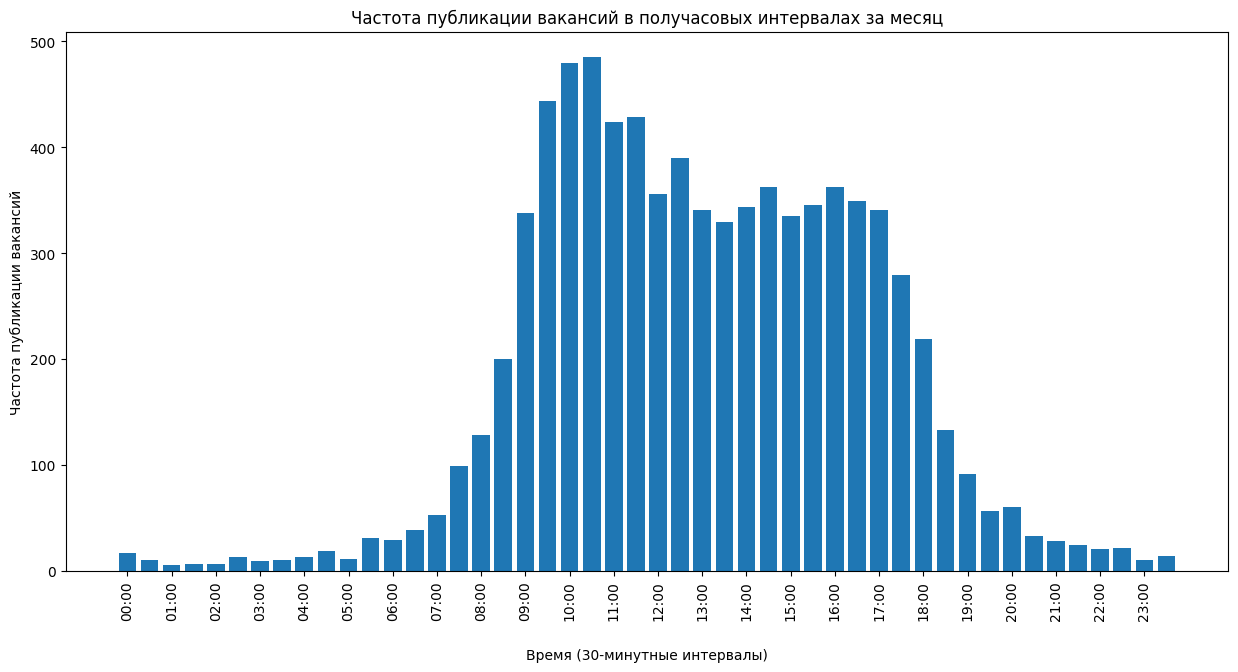

In [67]:
# Устанавливаем 'published_at' как индекс
df_30min = df_unique.set_index('published_at')

# Ресемплируем данные по получасовым интервалам
df_resampled = df_30min.resample('30T').count()  # Подсчет количества событий в каждом интервале

# Добавляем столбец с временем дня
df_resampled['time'] = df_resampled.index.time

# Группируем по времени дня (по получасовым интервалам в течение дня)
df_grouped = df_resampled.groupby('time').sum()

# Построение гистограммы
plt.figure(figsize=(15, 7))
plt.bar(df_grouped.index.astype(str), df_grouped['id'])
# Настройка меток по оси X
tick_interval = 2  # Показывать метку каждые 60 минут (2 * 30 минут)
plt.xticks(range(0, len(df_grouped.index), tick_interval), 
           [df_grouped.index[i].strftime('%H:%M') for i in range(0, len(df_grouped.index), tick_interval)],
           rotation=90)
plt.xlabel('Время (30-минутные интервалы)', labelpad=20)
plt.ylabel('Частота публикации вакансий')
plt.title('Частота публикации вакансий в получасовых интервалах за месяц')
plt.show()

Есть два небольших возвышения в районе 9-11 часов и 16-17 часов. Грубо говоря, в начале и в конце рабочего дня

Теперь посмотрим, как публиковались вакансии по дням недели.

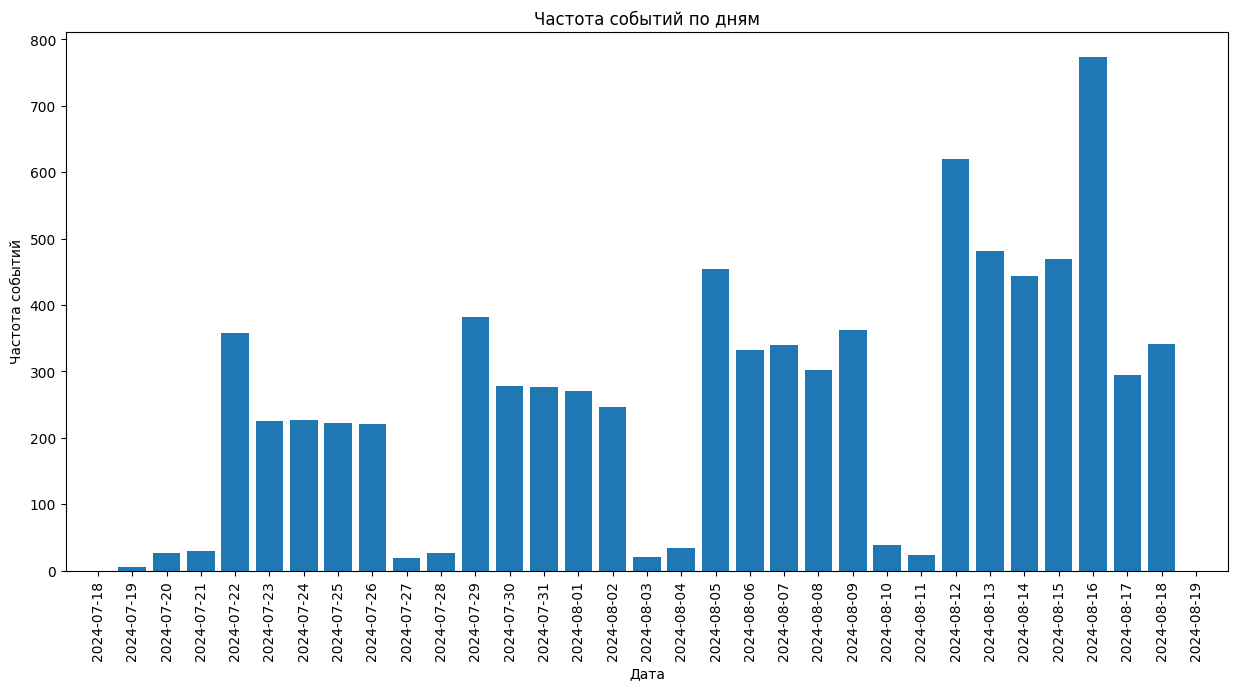

In [68]:
# Группируем по дате и считаем количество событий
df_daily = df_unique.groupby('date').size()

# Построение гистограммы
plt.figure(figsize=(15, 7))
plt.bar(df_daily.index, df_daily)

plt.xlabel('Дата')
plt.ylabel('Частота событий')
plt.title('Частота событий по дням')
# Форматирование меток на оси X
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Показать метки для каждого дня
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Форматирование меток в виде 'год-месяц-день'
plt.xticks(rotation=90)  # Поворот меток по оси X для лучшей читаемости
plt.show()

Видно, что понедельник является самым популярным днем, а в выходные число публикуемых вакансий резко снижается. На графике видна устойчивая тенденция роста среднего числа вакансий, но здесь ничего удивительного, т.к. это только открытые вакансии и естественно, что старых открытых вакансий меньше, чем новых. Самы высокий бар - это пятница 16 августа, из него понятно примерное число вакансий, которое публикуется в течение дня по нашим специальностям.

Проверим гипотезу, высказанную на старте исследования о том, что высокооплачиваемые вакансии закрываются быстрее остальных и это искажает данные по средней ЗП.

Выберем для проверки наиболее многочисленную группу:

In [69]:
df_unique.groupby(['vacancy', 'experience'])['id'].count()

vacancy             experience
Аналитик данных     Junior         566
                    Junior+       3357
                    Middle        1730
                    Senior          72
Системный аналитик  Junior         129
                    Junior+       1008
                    Middle        1230
                    Senior          47
Name: id, dtype: int64

Это Аналитики данных уровня Junior+

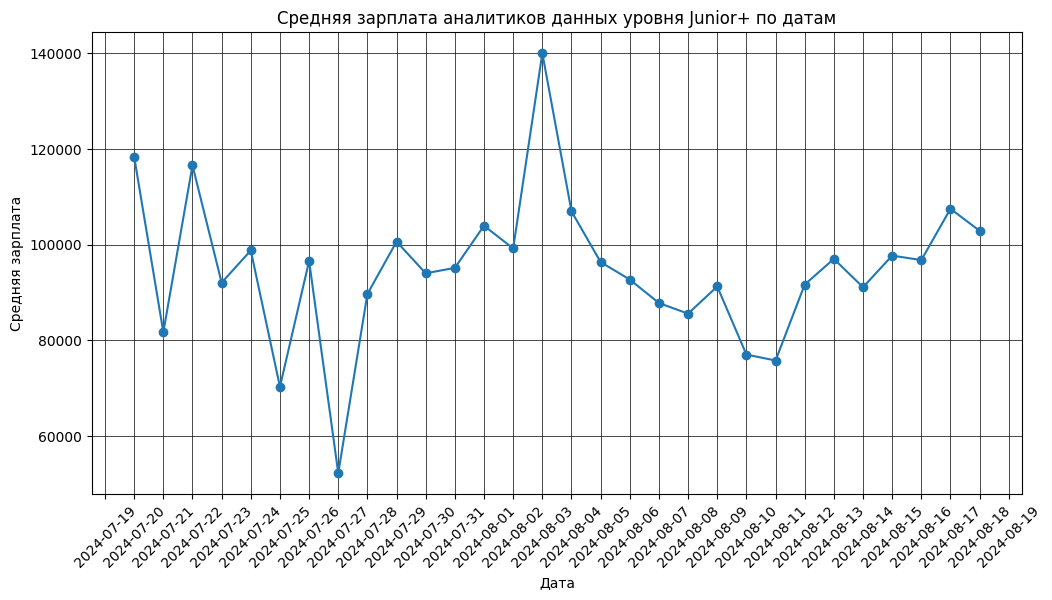

In [70]:
# Группируем по дате и считаем среднюю ЗП
df_daily_salary = df_unique.query('vacancy=="Аналитик данных" and experience=="Junior+"').groupby('date')['average_salary'].mean()

plt.figure(figsize=(12, 6))

# Построение графика
plt.plot(df_daily_salary.index, df_daily_salary.values, marker='o', linestyle='-')

# Настройка меток оси X и их формата
ax = plt.gca()  # Получаем текущую ось
ax.xaxis.set_major_locator(mdates.DayLocator())  # Основные метки - каждый день
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Формат меток оси X

# Добавление сетки
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')  # Основная сетка

# Заголовки и метки осей
plt.title('Средняя зарплата аналитиков данных уровня Junior+ по датам')
plt.xlabel('Дата')
plt.ylabel('Средняя зарплата')
plt.xticks(rotation=45)

plt.show()

Какой-то явной тенденции к увеличению средней ЗП из-за "плохих" старых вакансий и "выгодных" новых нет. Гипотеза не подтвердилась.

## 4. Определение долей грейдов для аналитиков данных и системных аналитиков

In [71]:
df_unique = pd.read_csv("df_unique_fin.csv", usecols=lambda column: column != 'Unnamed: 0')

In [72]:
df_da = df_unique.query('vacancy=="Аналитик данных"').groupby('experience')['id'].count()
df_da.index = ['Junior', 'Junior+', 'Middle', 'Senior']
df_da

Junior      566
Junior+    3357
Middle     1730
Senior       72
Name: id, dtype: int64

In [73]:
df_sa = df_unique.query('vacancy=="Системный аналитик"').groupby('experience')['id'].count()
df_sa.index = ['Junior', 'Junior+', 'Middle', 'Senior']
df_sa

Junior      129
Junior+    1008
Middle     1230
Senior       47
Name: id, dtype: int64

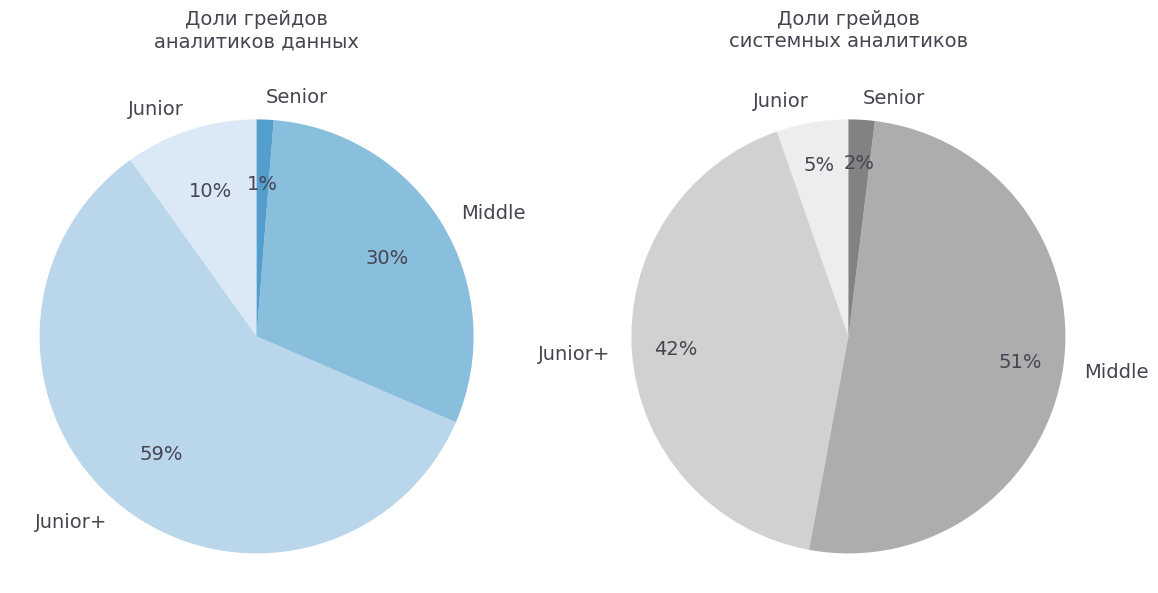

In [74]:
# Создание цветовой палитры
colors1 = sns.color_palette('Blues')
colors2 = sns.color_palette('Greys')

# Создание фигуры и осей
fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # 1 строка, 2 столбца

# Первый пайчарт
axes[0].pie(df_da, labels=df_da.index, colors=colors1,
            autopct='%.0f%%', pctdistance=0.7, labeldistance=1.1,
            startangle=90, radius=1.1, 
            textprops={'fontsize': 14, 'color': '#464451'})
axes[0].set_title('Доли грейдов\nаналитиков данных', 
                  fontsize=14, y=1.07, color='#464451')

# Второй пайчарт
axes[1].pie(df_sa, labels=df_sa.index, colors=colors2,
            autopct='%.0f%%', pctdistance=0.8, labeldistance=1.1,
            startangle=90, radius=1.1, 
            textprops={'fontsize': 14, 'color': '#464451'})
axes[1].set_title('Доли грейдов\nсистемных аналитиков', 
                  fontsize=14, y=1.07, color='#464451')

plt.show()

У аналитиков данных наибольшую долю вакансий 59% занял грейд Junior+. У системных аналитиков грейд Middle занимает также более половины всех вакансий - 51%.

## 5. Определение типичного места работы для разных грейдов

In [75]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8139 entries, 0 to 8138
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       8139 non-null   int64  
 1   name                     8139 non-null   object 
 2   department               1661 non-null   object 
 3   area                     8139 non-null   object 
 4   published_at             8139 non-null   object 
 5   url                      8139 non-null   object 
 6   employer                 8139 non-null   object 
 7   schedule                 8139 non-null   object 
 8   professional_roles       8139 non-null   object 
 9   experience               8139 non-null   object 
 10  employment               8139 non-null   object 
 11  description              8139 non-null   object 
 12  standardized_skills      5115 non-null   object 
 13  vacancy                  8139 non-null   object 
 14  average_salary          

### 5.1 ТОП работодателей

Отсортируем число вакансий по работодателям и их департаментам в порядке убывания и выведем первые 10 работодателей

In [76]:
# Шаг 1: Подсчитываем количество вакансий для каждой организации и департамента
vacancies_count = df_unique.groupby(['employer', 'department']).size().reset_index(name='department_vacancies')

# Шаг 2: Рассчитываем общее количество вакансий для каждой организации
total_vacancies = vacancies_count.groupby('employer')['department_vacancies'].sum().reset_index(name='employer_vacancies')

# Шаг 3: Объединяем общее количество вакансий обратно с подсчитанным количеством по департаментам
vacancies_count = vacancies_count.merge(total_vacancies, on='employer')

# Шаг 4: Сортируем по общему количеству вакансий (по убыванию), затем по количеству вакансий в департаменте (по убыванию)
vacancies_sorted = vacancies_count.sort_values(by=['employer_vacancies', 'employer', 'department_vacancies'], ascending=False)

vacancies_sorted.head(41)

,employer,department,department_vacancies,employer_vacancies
186,СБЕР,Сбер для экспертов,216,256
188,СБЕР,Сбер. IT,34,256
187,СБЕР,Сбер. Data Science,4,256
189,СБЕР,Сбер. Кибербезопасность,2,256
206,Т1,ГК Иннотех | Финтех (Иннотех),125,206
201,Т1,ГК Иннотех | Большие данные,48,206
204,Т1,ГК Иннотех | Мультипродакт,20,206
202,Т1,ГК Иннотех | Интеграция Консалтинг,10,206
205,Т1,ГК Иннотех | Сервионика,2,206
203,Т1,ГК Иннотех | Клауд,1,206


Лидирует СБЕР, замыкает десятку Спортмастер.

### 5.2 Распределение ЗП по грейдам

In [77]:
df_salary = df_unique.pivot_table(index=['vacancy', 'experience'], values='average_salary', aggfunc='mean', fill_value=0)

In [78]:
df_salary = df_salary.round()
df_salary

average_salary
vacancy            experience                
Аналитик данных    Junior             61383.0
                   Junior+            95498.0
                   Middle            169638.0
                   Senior            229993.0
Системный аналитик Junior             67331.0
                   Junior+           141309.0
                   Middle            255623.0
                   Senior            302325.0

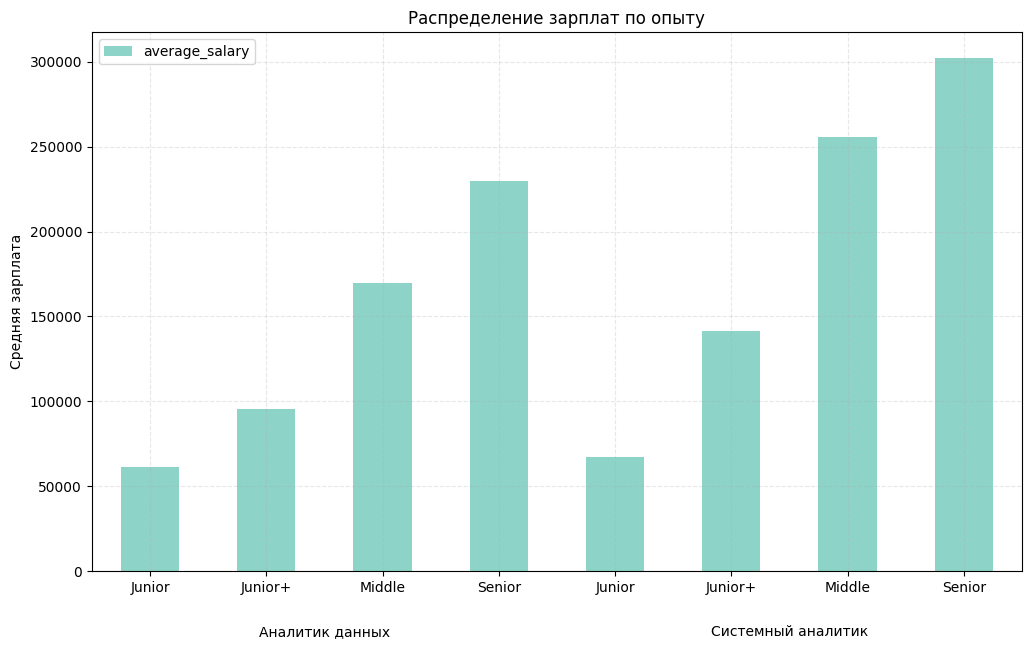

In [79]:
# Установка цветовой палитры
color_palette = plt.get_cmap('Set3').colors

# Построение сложенной гистограммы
ax = df_salary.plot(kind='bar', stacked=True, figsize=(12, 7), color=color_palette)

# Установка заголовков и меток
plt.title('Распределение зарплат по опыту')
plt.ylabel('Средняя зарплата')

# Изменение меток оси X
new_labels = [exp for vac, exp in df_salary.index]
ax.set_xticklabels(new_labels, rotation=0)

# Добавление группировки по вакансии
vacancies = df_salary.index.get_level_values('vacancy').unique()
vacancy_positions = []

# Определение позиций для меток вакансий
for vacancy in vacancies:
    vacancy_positions.append(
        df_salary.index.get_level_values('vacancy').tolist().index(vacancy) +
        df_salary.index.get_level_values('vacancy').tolist().count(vacancy) / 2 - 0.5
    )

ax.set_xticks(ax.get_xticks())

# Установка меток групп аналитиков
for i, (vacancy, pos) in enumerate(zip(vacancies, vacancy_positions)):
    ax.text(pos, -0.1, vacancy, ha='center', va='top', transform=ax.get_xaxis_transform())
    
# Удаление общей подписи оси X
ax.set_xlabel('')

# Добавление фоновый сетки
ax.grid(True, linestyle='--', alpha=0.3)

plt.show()

Посчитаем ЗП для Москвы и сравним, сколько процентов добавляется по сравнению со средней ЗП

In [80]:
df_salary_msk = (df_unique.query('area=="Москва"')
                 .pivot_table(index=['vacancy', 'experience'], 
                              values='average_salary', 
                              aggfunc='mean', 
                              fill_value=0)
                .round())

In [81]:
df_salary['salary_msk'] = df_salary_msk['average_salary']
df_salary['+%'] = round((df_salary['salary_msk']/df_salary['average_salary'] - 1)*100, 1)
df_salary

average_salary  salary_msk    +%
vacancy            experience                                  
Аналитик данных    Junior             61383.0     74866.0  22.0
                   Junior+            95498.0    121684.0  27.4
                   Middle            169638.0    200949.0  18.5
                   Senior            229993.0    239185.0   4.0
Системный аналитик Junior             67331.0     91686.0  36.2
                   Junior+           141309.0    171694.0  21.5
                   Middle            255623.0    267329.0   4.6
                   Senior            302325.0    330000.0   9.2

А как обстоит дело с ЗП при удаленном режиме работы? 

In [82]:
df_salary_remote = (df_unique.query('schedule=="Удаленная работа"')
                    .pivot_table(index=['vacancy', 'experience'], 
                                 values='average_salary', 
                                 aggfunc='mean', 
                                 fill_value=0)
                   .round())

In [83]:
df_salary_remote_msk = (df_unique.query('area=="Москва" and schedule=="Удаленная работа"')
                 .pivot_table(index=['vacancy', 'experience'], 
                              values='average_salary', 
                              aggfunc='mean', 
                              fill_value=0)
                .round())

In [84]:
df_salary_remote['salary_remote_msk'] = df_salary_remote_msk['average_salary']
df_salary_remote['+%_remote'] = round((df_salary_remote['salary_remote_msk']/df_salary_remote['average_salary'] - 1)*100, 1)
df_salary_remote

average_salary  salary_remote_msk  +%_remote
vacancy            experience                                              
Аналитик данных    Junior             60367.0            57410.0       -4.9
                   Junior+            96230.0           121494.0       26.3
                   Middle            208052.0           224860.0        8.1
                   Senior            292000.0           315000.0        7.9
Системный аналитик Junior             68412.0            80786.0       18.1
                   Junior+           158331.0           178245.0       12.6
                   Middle            266274.0           272998.0        2.5
                   Senior            316000.0           320000.0        1.3

В среднем, без привязки к рабочему месту, преимущество москвичей снизилось.

### 5.3 Распределение типов занятости по грейдам

In [85]:
df_employment = df_unique.pivot_table(index=['vacancy', 'experience'], columns='employment', aggfunc='size', fill_value=0)

In [86]:
df_employment

employment                     Волонтерство  Полная занятость  \
vacancy            experience                                   
Аналитик данных    Junior                 0               470   
                   Junior+                1              3326   
                   Middle                 0              1711   
                   Senior                 0                69   
Системный аналитик Junior                 0                69   
                   Junior+                0              1005   
                   Middle                 0              1220   
                   Senior                 0                46   

employment                     Проектная работа  Стажировка  \
vacancy            experience                                 
Аналитик данных    Junior                     0          93   
                   Junior+                    5           4   
                   Middle                     8           0   
                   Senior                     3           0   
Системный аналитик Junior                     0          60   
                   Junior+                    1           0   
                   Middle                     5           0   
                   Senior                     1           0   

employment                     Частичная занятость  
vacancy            experience                       
Аналитик данных    Junior                        3  
                   Junior+                      21  
                   Middle                       11  
                   Senior                        0  
Системный аналитик Junior                        0  
                   Junior+                       2  
                   Middle                        5  
                   Senior                        0

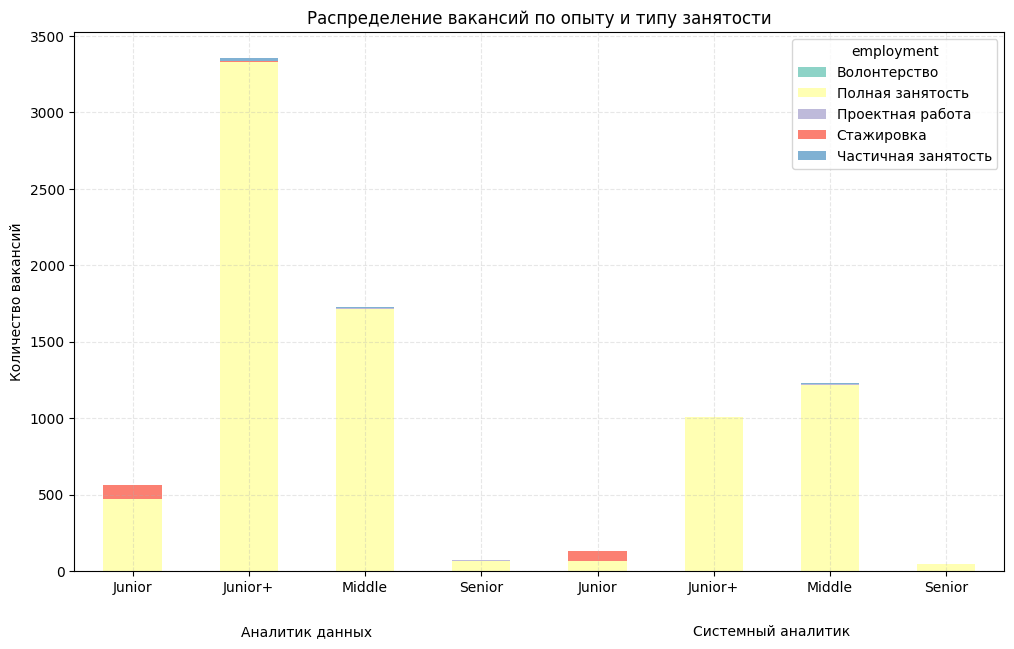

In [87]:
# Установка цветовой палитры
color_palette = plt.get_cmap('Set3').colors

# Построение сложенной гистограммы
ax = df_employment.plot(kind='bar', stacked=True, figsize=(12, 7), color=color_palette)

# Установка заголовков и меток
plt.title('Распределение вакансий по опыту и типу занятости')
plt.ylabel('Количество вакансий')

# Изменение меток оси X
new_labels = [exp for vac, exp in df_employment.index]
ax.set_xticklabels(new_labels, rotation=0)

# Добавление группировки по вакансии
vacancies = df_employment.index.get_level_values('vacancy').unique()
vacancy_positions = []

# Определение позиций для меток вакансий
for vacancy in vacancies:
    vacancy_positions.append(
        df_employment.index.get_level_values('vacancy').tolist().index(vacancy) +
        df_employment.index.get_level_values('vacancy').tolist().count(vacancy) / 2 - 0.5
    )

ax.set_xticks(ax.get_xticks())

# Установка меток групп аналитиков
for i, (vacancy, pos) in enumerate(zip(vacancies, vacancy_positions)):
    ax.text(pos, -0.1, vacancy, ha='center', va='top', transform=ax.get_xaxis_transform())
    
# Удаление общей подписи оси X
ax.set_xlabel('')

# Добавление нечастой полупрозрачной фоновый сетки
ax.grid(True, linestyle='--', alpha=0.3)

plt.show()


Мы видим, что полная занятость безальтернативна. Для специалистов без опыта часто может встречаться стажировка.

### 5.4 Распределение графиков работы по грейдам

In [88]:
df_schedule = df_unique.pivot_table(index=['vacancy', 'experience'], columns='schedule', aggfunc='size', fill_value=0)

In [89]:
df_schedule

schedule                       Вахтовый метод  Гибкий график  Полный день  \
vacancy            experience                                               
Аналитик данных    Junior                   0             41          459   
                   Junior+                  1             61         2800   
                   Middle                   1             74         1299   
                   Senior                   0              3           51   
Системный аналитик Junior                   0             15           58   
                   Junior+                  0             44          666   
                   Middle                   0             42          715   
                   Senior                   0              4           26   

schedule                       Сменный график  Удаленная работа  
vacancy            experience                                    
Аналитик данных    Junior                   3                63  
                   Junior+                 22               473  
                   Middle                   2               354  
                   Senior                   0                18  
Системный аналитик Junior                   0                56  
                   Junior+                  2               296  
                   Middle                   1               472  
                   Senior                   0                17

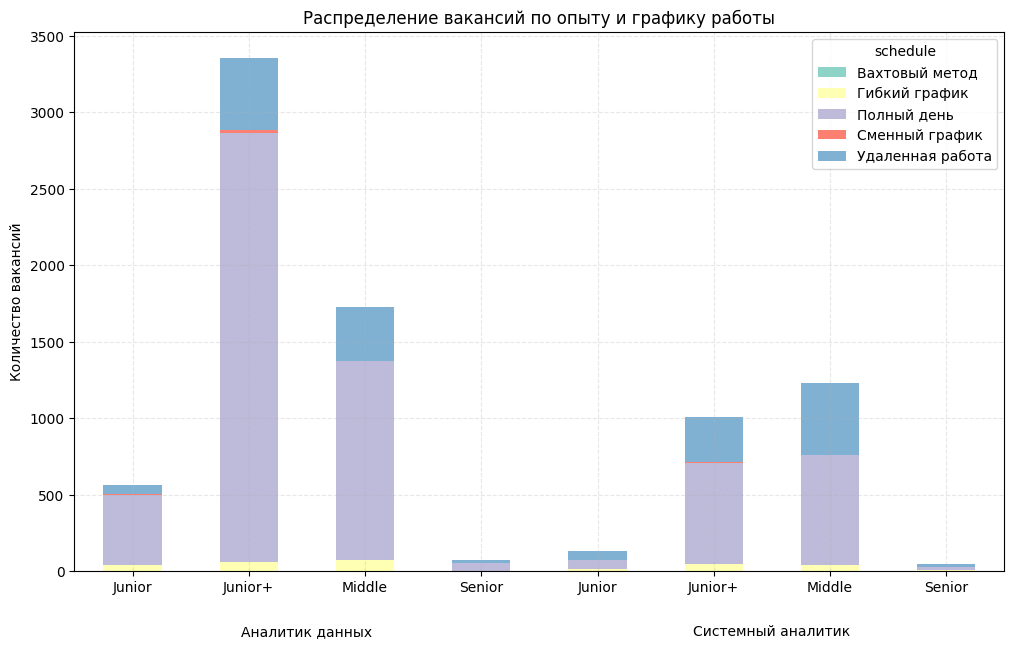

In [90]:
# Установка цветовой палитры
color_palette = plt.get_cmap('Set3').colors

# Построение сложенной гистограммы
ax = df_schedule.plot(kind='bar', stacked=True, figsize=(12, 7), color=color_palette)

# Установка заголовков и меток
plt.title('Распределение вакансий по опыту и графику работы')
plt.ylabel('Количество вакансий')

# Изменение меток оси X
new_labels = [exp for vac, exp in df_schedule.index]
ax.set_xticklabels(new_labels, rotation=0)

# Добавление группировки по вакансии
vacancies = df_schedule.index.get_level_values('vacancy').unique()
vacancy_positions = []

# Определение позиций для меток вакансий
for vacancy in vacancies:
    vacancy_positions.append(
        df_schedule.index.get_level_values('vacancy').tolist().index(vacancy) +
        df_schedule.index.get_level_values('vacancy').tolist().count(vacancy) / 2 - 0.5
    )

ax.set_xticks(ax.get_xticks())

# Установка меток групп аналитиков
for i, (vacancy, pos) in enumerate(zip(vacancies, vacancy_positions)):
    ax.text(pos, -0.1, vacancy, ha='center', va='top', transform=ax.get_xaxis_transform())
    
# Удаление общей подписи оси X
ax.set_xlabel('')

# Добавление нечастой полупрозрачной фоновый сетки
ax.grid(True, linestyle='--', alpha=0.3)

plt.show()


До сих пор преобладает работа в офисе полный день. Этому варианту пытается составить конкуренцию удаленный режим работы, но пока проигрывает.

## 6 Требование "твердых" и "мягких" навыков в вакансиях от грейда к грейду.

Снова посчитаем все навыки и получим отсортированный список:

In [91]:
# Разделяем строки на отдельные навыки и создаем список всех навыков
all_skills = df_unique['standardized_skills'].str.split(', ').explode()

# Подсчитываем количество вхождений каждого навыка
skill_counts = all_skills.value_counts()

In [92]:
sklls = pd.DataFrame(skill_counts)

In [93]:
skills_list = sklls.index.tolist()

In [94]:
len(skills_list)

2611

Возьмем первые двести навыков и разложим вручную их по двум спискам - хард и софт скиллс.

In [95]:
hard_skills = ['SQL', 'BPMN', 'Системный анализ', 'UML', 'Анализ данных', 'Excel', 'REST', 
 'Python', 'Базы данных', 'Аналитика', 'Работа с большим объемом информации', 'Бизнес-анализ', 'Разработка ТЗ', 
 'SOAP', 'JSON', 'Power BI', 'Аналитические исследования', 'XML', 'API', 'Jira', 'Сбор и анализ информации', 
 'Confluence', 'PowerPoint', 'Kafka', 'Анализ рынка', 'Анализ бизнес показателей', 'Agile', 'Английский', 
 'Моделирование бизнес процессов', 'Маркетинговый анализ', 'Прогнозирование', 'Оптимизация бизнес-процессов', 'DWH', 
 'Аналитика продаж', 'Математическая статистика', 'Oracle', 'Маркетинговые исследования', 'Visio', 
 'Техническая документация', 'Scrum', 'Системная интеграция', 'Статистический анализ', 'Tableau', 'ETL', 
 'Анализ конкурентной среды', 'Use Case', 'Postman', 'A/B-тест', 'Анализ требований', 'Сводные таблицы', 'Power Query', 
 'Git', 'Clickhouse', 'XSD', 'Swagger', 'Управление проектами', 'User Story', 'Информационные технологии', 
 'Анализ бизнес-процессов', 'Математический анализ', 'RabbitMQ', 'Яндекс.Метрика', 'Визуализация данных', 'VBA', 
 'Big Data', 'Подготовка отчетов', 'HR-аналитика', 'MS Office', 'Hadoop', 'Описание бизнес-процессов', 
 'Google Analytics', 'CRM', 'Ценообразование', 'Формирование аналитической отчетности', 'Автоматизация процессов',
 'Greenplum', 'Проектная документация', 'Экономический анализ', 'Анализ ассортиментной линейки',
 'Анализ финансовых показателей', 'Конкурентная аналитика', 'Финансовый анализ', 'Разработка ПО', 'Linux', 
 'Пользователь ПК', 'Анализ продаж', 'ABC-анализ', 'Java', 'Микросервисная архитектура', 'HTTP', 'ВПР', 
 'Сбор требований', 'JavaScript', 'Исследования рынка', 'Power Pivot', 'Figma', 'Разработка функциональных требований', 
 'HTML', 'Документирование бизнес-требований', 'Оптимизация численности персонала', 'Финансовая отчетность', 'Camunda', 
 'SWOT анализ', 'Разработка инструкций', 'pandas', '1С: Предприятие 8', 'Управленческая отчетность', 'Мониторинг рынка', 
 'MS Access', 'Анализ ценообразования', 'Анализ рисков', 'Математическое моделирование', 'Веб-аналитика', 
 'Бухгалтерский учет', 'Разработка проектной документации', 'IDEF0', 'DAX', 'MS Word', 'ERD', 'Управление требованиями',
 'IDEF', 'Планирование продаж', 'Apache Airflow', 'Планирование', 'Airflow', 'WMS', 'Статистика', 'Grafana', 
 'Мониторинг цен', 'MS Project', 'Контроль и анализ ценообразования', 'Тестирование', 'Qlik Sense', 'E-Commerce', 
 'Маркетплейсы', 'Моделирование бизнес-процессов', 'Прогнозирование продаж', 'Складская логистика', 'Ведение отчетности',
 'Retail', 'Продуктовые метрики', 'Сквозная аналитика', 'Docker', 'Аналитика маркетплейсов', 'Business Intelligence Systems',
 'Работа с системами аналитики', 'Реинжиниринг бизнес-процессов', 'Разработка маркетинговой стратегии', 'Продвижение бренда',
 'Spark', 'Бизнес-консультирование', 'Разработка бизнес-требований', 'WEB аналитика', 'Веб-программирование', 'Анализ ФХД', 
 'ERP', 'ГОСТ', 'Waterfall', 'Маркетинговое планирование', 'data base', 'Информационная безопасность', 'Kubernetes', 
 'жизненный цикл ПО', 'Draw.io', 'МСФО', 'ООП', 'Разработка технической документации', 
 'Анализ эффективности маркетинговых кампаний', 'Numpy', 'Бизнес-моделирование', 'ARIS']

In [96]:
soft_skills = ['Аналитическое мышление', 'Постановка задач разработчикам', 'Подготовка презентаций', 'Аналитический склад ума', 
 'Работа в команде', 'Системное мышление', 'Деловая коммуникация', 'Грамотная речь', 'Обучение и развитие', 
 'Навыки презентации', 'Ответственность', 'Многозадачность', 'Деловая переписка', 'Точность и внимательность к деталям', 
 'Системный подход', 'Работа в режиме многозадачности', 'Командообразование', 'Ориентация на результат', 
 'Организаторские навыки', 'Коммуникабельность', 'Грамотность', 'Аналитические способности', 'Проведение презентаций',
 'Деловое общение', 'Работа в условиях многозадачности', 'Внимательность', 'Стратегическое мышление', 
 'Навыки переговоров', 'Управление командой']

Используем функцию для вычисления доли твердых и мягких навыков. Создадим под них новые столбцы. Также, поскольку списки содержат только двести навыков, посчитаем и долю неотнесенных к той или иной категории навыков - тех, что не попали в наш список.

In [97]:
# Функция для вычисления соотношения
def calculate_skill_ratio(skills_str):
    if pd.isna(skills_str):
        return (np.nan, np.nan, np.nan)  # Возвращаем кортеж из NaN, если значение отсутствует

    skills = skills_str.split(', ')
    hard_count = sum(skill in hard_skills for skill in skills)
    soft_count = sum(skill in soft_skills for skill in skills)
    random_count = len(skills) - hard_count - soft_count  # Количество неопознанных навыков
    
    total_skills = hard_count + soft_count + random_count
    
    if total_skills == 0:
        return (np.nan, np.nan, np.nan)  # Возвращаем кортеж из NaN, если нет известных навыков
    
    # Вычисляем соотношения
    soft_ratio = soft_count / total_skills
    hard_ratio = hard_count / total_skills
    random_ratio = random_count / total_skills

    return (soft_ratio, hard_ratio, random_ratio)

# Применяем функцию к каждому значению в столбце standardized_skills
df_unique['soft_skill_ratio'], df_unique['hard_skill_ratio'], df_unique['random_skill_ratio'] = zip(*df_unique['standardized_skills'].apply(calculate_skill_ratio))

Соберем новые данные по долям навыков в таблицу, усреднив их по нашим грейдам

In [98]:
df_skill_ratio = df_unique.groupby(['vacancy', 'experience'])[['soft_skill_ratio', 
                                                               'hard_skill_ratio', 
                                                               'random_skill_ratio']].mean().reset_index()
df_skill_ratio[['soft_skill_ratio', 
                 'hard_skill_ratio', 
                 'random_skill_ratio']] = df_skill_ratio[['soft_skill_ratio', 
                                                          'hard_skill_ratio', 
                                                          'random_skill_ratio']]*100
df_skill_ratio = round(df_skill_ratio, 1)

# Используем melt для преобразования skill_ratio в строки
df_melted = df_skill_ratio.melt(id_vars=['vacancy', 'experience'], 
                                value_vars=['soft_skill_ratio', 'hard_skill_ratio', 'random_skill_ratio'],
                                var_name='skill_type', value_name='value')

# Применяем pivot для того, чтобы experience стал заголовками столбцов
df_result = df_melted.pivot_table(index=['vacancy', 'skill_type'], columns='experience', values='value')

# Сбрасываем индекс, чтобы получить DataFrame в удобном формате
df_result = df_result.reset_index()
df_result

experience,vacancy,skill_type,Junior,Junior+,Middle,Senior
0,Аналитик данных,hard_skill_ratio,63.0,72.2,75.4,81.1
1,Аналитик данных,random_skill_ratio,19.3,17.8,17.9,15.2
2,Аналитик данных,soft_skill_ratio,17.6,10.0,6.7,3.7
3,Системный аналитик,hard_skill_ratio,67.6,80.6,86.0,80.9
4,Системный аналитик,random_skill_ratio,15.2,13.2,10.2,13.6
5,Системный аналитик,soft_skill_ratio,17.2,6.3,3.8,5.5


## 7. Определение наиболее важных хард и софт скиллов кандидатов на вакансии аналитика данных и системного аналитика с разбивкой по грейдам

Здесь используется функция, которая отбирает навыки для каждого грейда. В данном случае эмпирическим путем установлен порог в 40% кумулятивной доли наиболее важных навыков. Исключены навыки с совсем абстрактной формулировкой - "Анализ данных" и "Аналитика".

In [99]:
# Список навыков, которые нужно исключить
excluded_skills = {'Анализ данных', 'Аналитика'}

# Определяем функцию для получения топ-40% навыков в каждой группе
def top_40_percent_skills(group):
    # Убираем строки с NaN или пустыми значениями
    group = group.dropna(subset=['standardized_skills'])
    group = group[group['standardized_skills'].str.strip() != '']
    
    # Объединяем все строки в одну и разделяем на отдельные навыки
    all_skills = ', '.join(group['standardized_skills']).split(', ')
    
    # Подсчитываем частоту каждого навыка, игнорируя исключенные навыки
    skill_counts = Counter(skill.strip() for skill in all_skills if skill.strip() and skill.strip() not in excluded_skills)
    
    # Преобразуем в DataFrame для удобства
    skill_counts_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])
    
    # Считаем общее количество навыков
    total_count = skill_counts_df['Count'].sum()
    
    # Вычисляем кумулятивную долю
    skill_counts_df = skill_counts_df.sort_values(by='Count', ascending=False)
    skill_counts_df['Cumulative'] = skill_counts_df['Count'].cumsum() / total_count
    
    # Фильтруем навыки, которые составляют 40% упоминаний
    top_skills_df = skill_counts_df[skill_counts_df['Cumulative'] <= 0.40]
    
    # Получаем навыки, которые составляют до 40% упоминаний
    top_skills = top_skills_df['Skill'].tolist()
    
    # Преобразуем список навыков в строку, разделенную запятыми
    top_skills_str = ', '.join(top_skills)
    
    return top_skills_str

# Применяем функцию к каждой группе и получаем DataFrame
result_1 = df_unique.groupby(['vacancy', 'experience']).apply(top_40_percent_skills).reset_index()

In [100]:
# Установим максимальное количество отображаемых символов в строке
pd.options.display.max_colwidth = 300

In [101]:
result_1

,vacancy,experience,0
0,Аналитик данных,Junior,"Аналитическое мышление, Excel, SQL, Работа с большим объемом информации, Базы данных, Python, Сбор и анализ информации, PowerPoint, Power BI, Аналитические исследования, Бизнес-анализ, Сводные таблицы, Аналитический склад ума, Статистический анализ"
1,Аналитик данных,Junior+,"SQL, Аналитическое мышление, Excel, Работа с большим объемом информации, Python, Базы данных, Power BI, Аналитические исследования, Бизнес-анализ, BPMN, Сбор и анализ информации, Системный анализ, PowerPoint, Разработка ТЗ, UML"
2,Аналитик данных,Middle,"SQL, Python, Аналитическое мышление, BPMN, Системный анализ, Бизнес-анализ, Excel, Базы данных, UML, Power BI, REST, Аналитические исследования, Работа с большим объемом информации, Разработка ТЗ"
3,Аналитик данных,Senior,"SQL, BPMN, Python, Системный анализ, Бизнес-анализ, UML, Разработка ТЗ, REST, Базы данных, Jira, Power BI"
4,Системный аналитик,Junior,"SQL, Системный анализ, Аналитическое мышление, Бизнес-анализ, Базы данных, REST, JSON, BPMN, UML, Аналитический склад ума, Python"
5,Системный аналитик,Junior+,"SQL, BPMN, Системный анализ, UML, REST, Разработка ТЗ"
6,Системный аналитик,Middle,"SQL, UML, BPMN, Системный анализ"
7,Системный аналитик,Senior,"Системный анализ, UML, BPMN, SQL"


Наблюдается интересная тенденция - с ростом грейда уменьшается разнообразие скиллов, входящих в первые 40%. Это не означает, что к претендентам предъявляются пониженные требования. Скорее, с ростом уровня специалиста увеличивается разнообразие требований и в первые 40% в итоге попадают только самые общие.

Также, для аналитиков данных начиная с уровня Junior+ в ТОП попали навыки, которые наиболее востребованы у системных аналитиков. Этот вопрос требует дополнительного изучения. Возможно, мы не очень удачно поделили вакансии для системных и дата аналитиков, что привело к такому результату. В дальнейшем планируется выявить дополнительный критерий для уточнения выбора между одними и другими.

## 8. Выводы

* Вакансии наиболее активно размещаются в начале и в конце рабочего дня;
* В течение недели больше всего вакансий публикуется в понедельник. Каждый день,кроме выходных, публикуется более 500 вакансий по аналитика данных и системным аналитикам;
* Была проверена гипотеза о большей средней ЗП для свежих вакансий. Она не подтвердилась;
* Число вакансий в зависимости от грейда распределилось следующим образом - для аналитиков данных 59% занял грейд Junior+, Middle - 30%, Junior - 10%, Senior - 1%. У системных аналитиков грейд Middle занимает - 51%, Junior+ - 42%, Junior - 5%, Senior - 2%;
* ТОП-10 работодателей - Сбер, Т1, МТС, ВТБ, Ozon, ПСБ, Альфа-банк, Яндекс, Билайн, Спортмастер;
* Средние ЗП получились следующие. Для дата аналитиков Джуниор - 61 тыс, Джуниор+ - 95 тыс, Миддл - 170 тыс, Сеньор - 230 тыс. Для системных аналитиков, соответственно - 67 тыс, 141 тыс, 255 тыс, 302 тыс. Видно, что ЗП системных аналитиков гораздо больше;
* Мы сравнили московскую зарплату с региональной и получили разницу более 20% для низких грейдов в пользу московской ЗП. Для мидлов и сеньоров разница не так велика, но тоже есть;
* В каждом грейде преобладает полная занятость. Для специалистов без опыта часто может встречаться стажировка;
* Основной график работы для всех грейдов - полный день в офисе;
* Твердые и мягкие навыки распределились в пользу твердых навыков, процент которых может достигать 80 но не менее 60%. Мягкие навыки занимают от 10 до 20 процентов. Оставшийся процент для неклассифицированных навыков может сыграть как в одну, так и в другую сторону, но существенно уже ничего не поменяет;
* Определяя наиболее важные навыки мы выяснили, что с ростом уровня специалиста увеличивается разнообразие требований к ним, когда помимо основных скиллов требуются знания в специфичесикх областях;